# Setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score


In [ ]:
# Define the URL of the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/AysenurYrr/ML-Lab/main/UCI%20Bank%20Marketing/dataset/bank-additional-full.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url, sep=';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# All Features
all_features = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "day_of_week",
    "poutcome",
    "age",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
    "nr.employed"
]

# Categorical Features
categorical_features = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "day_of_week",
    "poutcome"
]

# Numeric Features
numeric_features = [
    "age",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
    "nr.employed"
]

# Part 1: EDA


## Univariate Analysis

### Categorical Features Descriptive Statistics


In [ ]:
for feature in categorical_features:
  print(f"\nDescriptive Statics of {feature}")
  print(f"Number of unique values in : {df[feature].unique().size}")
  print(f"Mode of : {df[feature].mode()[0]}")
  print(f"Unknown value count: {(df[feature] == 'unknown').sum()}")
  print("-" * 40)



Descriptive Statics of job
Number of unique values in : 12
Mode of : admin.
Unknown value count: 330
----------------------------------------

Descriptive Statics of marital
Number of unique values in : 4
Mode of : married
Unknown value count: 80
----------------------------------------

Descriptive Statics of education
Number of unique values in : 8
Mode of : university.degree
Unknown value count: 1731
----------------------------------------

Descriptive Statics of default
Number of unique values in : 3
Mode of : no
Unknown value count: 8597
----------------------------------------

Descriptive Statics of housing
Number of unique values in : 3
Mode of : yes
Unknown value count: 990
----------------------------------------

Descriptive Statics of loan
Number of unique values in : 3
Mode of : no
Unknown value count: 990
----------------------------------------

Descriptive Statics of contact
Number of unique values in : 2
Mode of : cellular
Unknown value count: 0
---------------------

The number of "unknown" values is the same for both the housing and loan features. This suggests that the rows containing "unknown" for these features might correspond to the same records.

### Numeric Features Descriptive Statistics


In [ ]:
for feature in numeric_features:
    print(f"Descriptive Analysis for {feature}:")
    print(f"  Mean: {df[feature].mean():.2f}")
    print(f"  Median: {df[feature].median():.2f}")
    print(f"  Std Deviation: {df[feature].std():.2f}")
    print(f"  Min: {df[feature].min()}")
    print(f"  Max: {df[feature].max()}")
    print(f"  Skewness: {df[feature].skew():.2f}")
    print(f"  Kurtosis: {df[feature].kurtosis():.2f}")
    print("-" * 40)

Descriptive Analysis for age:
  Mean: 40.02
  Median: 38.00
  Std Deviation: 10.42
  Min: 17
  Max: 98
  Skewness: 0.78
  Kurtosis: 0.79
----------------------------------------
Descriptive Analysis for duration:
  Mean: 258.29
  Median: 180.00
  Std Deviation: 259.28
  Min: 0
  Max: 4918
  Skewness: 3.26
  Kurtosis: 20.25
----------------------------------------
Descriptive Analysis for campaign:
  Mean: 2.57
  Median: 2.00
  Std Deviation: 2.77
  Min: 1
  Max: 56
  Skewness: 4.76
  Kurtosis: 36.98
----------------------------------------
Descriptive Analysis for pdays:
  Mean: 962.48
  Median: 999.00
  Std Deviation: 186.91
  Min: 0
  Max: 999
  Skewness: -4.92
  Kurtosis: 22.23
----------------------------------------
Descriptive Analysis for previous:
  Mean: 0.17
  Median: 0.00
  Std Deviation: 0.49
  Min: 0
  Max: 7
  Skewness: 3.83
  Kurtosis: 20.11
----------------------------------------
Descriptive Analysis for emp.var.rate:
  Mean: 0.08
  Median: 1.10
  Std Deviation: 1.57
 

* Age Feature:
The mean and median values are close, indicating a near-normal distribution.
The presence of a few older individuals acts as outliers, causing a slight positive skewness.

* Duration Feature:
Some values are zero, meaning no conversation occurred with the customer, leading to a 'no' outcome for the target variable (y).
The high standard deviation suggests significant variability in call durations.
Considering removing instances with zero duration, as they lack meaningful information for training a predictive model.

* Campaign Feature:
The mean is 2.56, but the maximum value is 56, indicating a wide range.
This large maximum value contributes to positive skewness in the data.

* Pdays Feature:
A value of 999 serves as a placeholder, indicating the customer was not previously contacted.
The median value of 999 shows that most customers had no prior contact in previous campaigns.

* Previous Feature:
A value of 0 indicates no prior contact in previous campaigns.
The median value of 0 confirms that the majority of customers were not contacted before.

### Age: A numeric Feature


In [ ]:
print(df.columns)
null_count = df['age'].isnull().sum()
null_count

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


0

Age Column Statistics:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


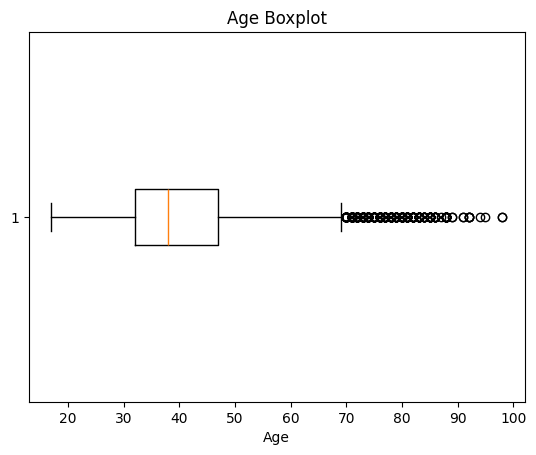

In [ ]:
print("Age Column Statistics:")
print(df['age'].describe())

# Age Column Boxplot
plt.figure()
plt.boxplot(df['age'].dropna(), vert=False)
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()


I see the most of people in dataset are near to their fourties. Age maybe indicate something. Older people maybe don't prefer to subscribe a deposit

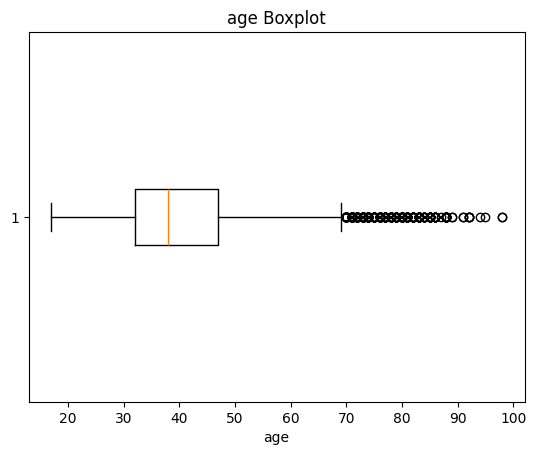

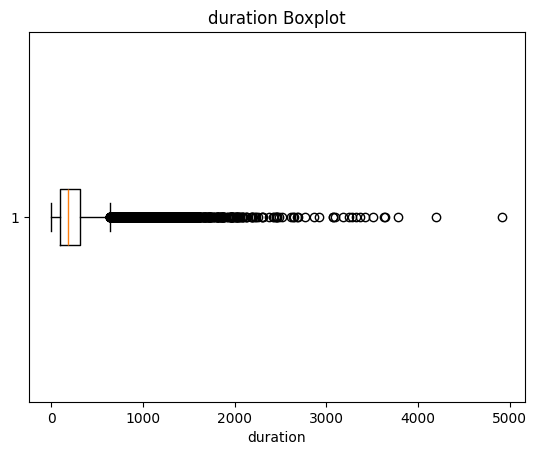

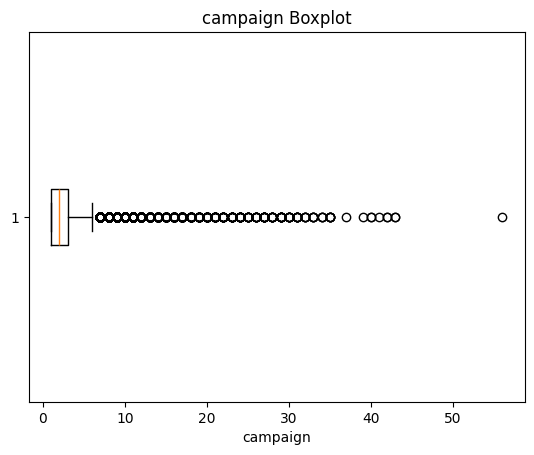

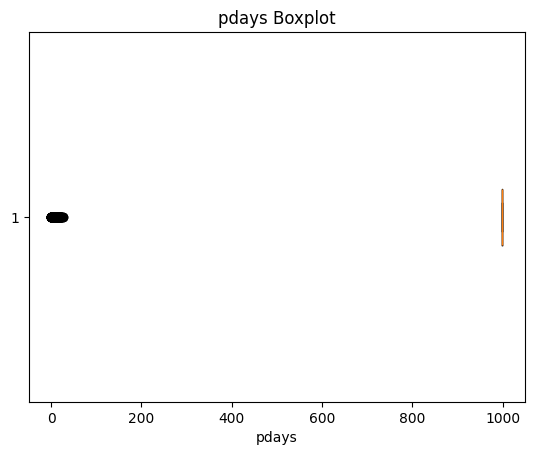

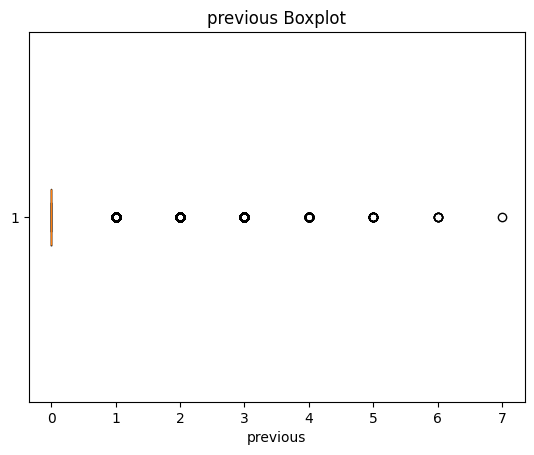

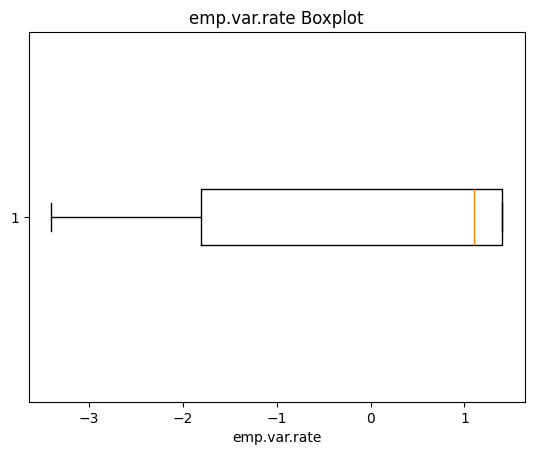

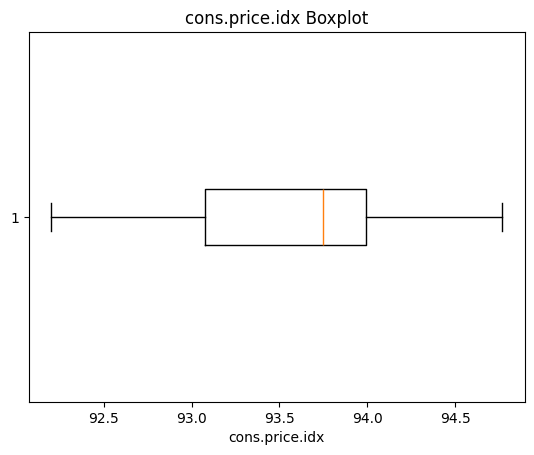

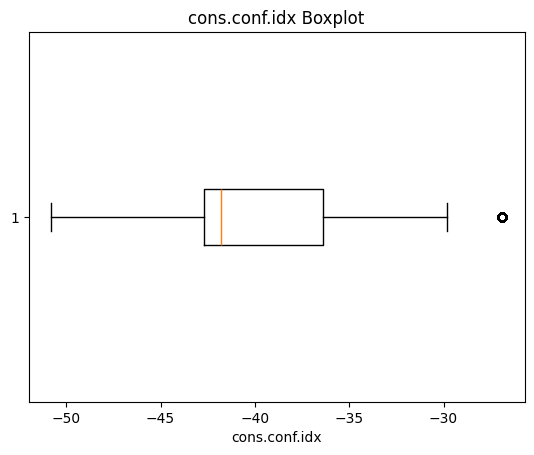

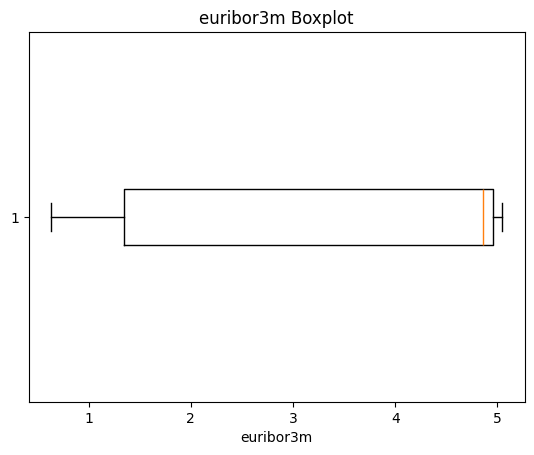

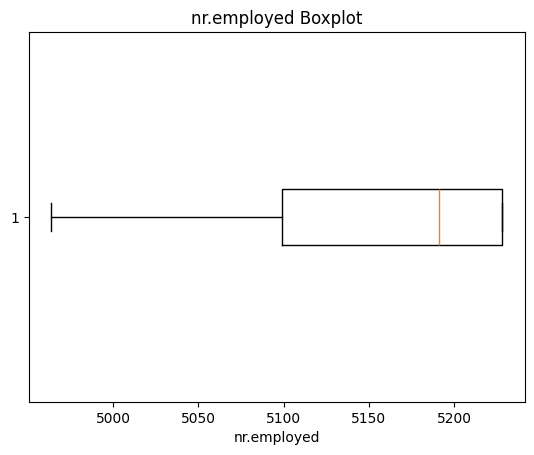

In [ ]:
for feature in numeric_features:
  plt.figure()
  plt.boxplot(df[feature], vert=False)
  plt.title(f'{feature} Boxplot')
  plt.xlabel(feature)
  plt.show()

### Job: A categorical feature

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Most common job is admin


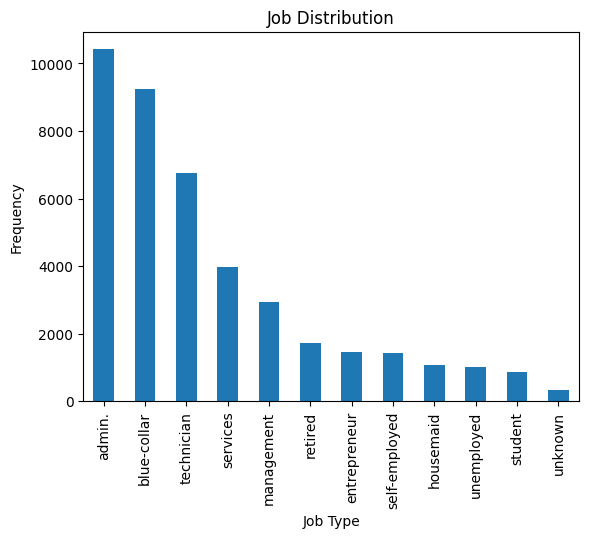

In [ ]:
print(df['job'].value_counts())

print("\nMost common job is admin")

df['job'].value_counts().plot(kind='bar')
plt.title('Job Distribution')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.show()


3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

8 - contact: contact communication type (categorical: "cellular","telephone")

9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")




### All Categorical Features BarPlot

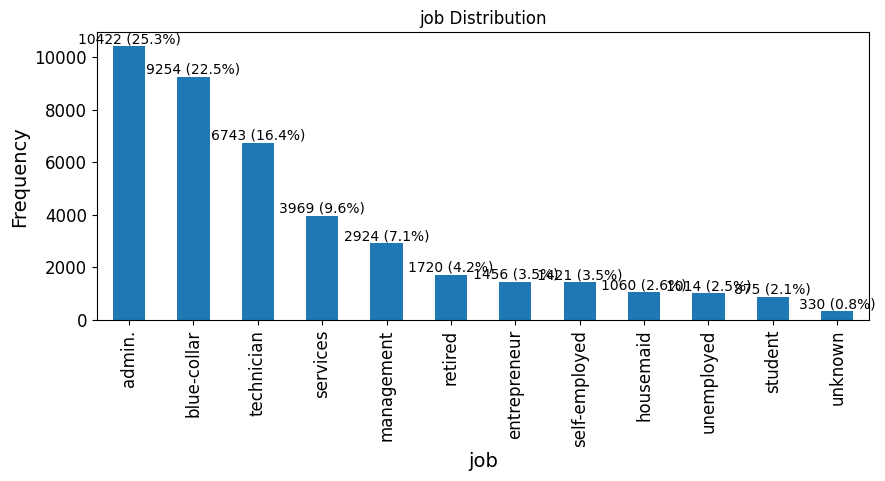

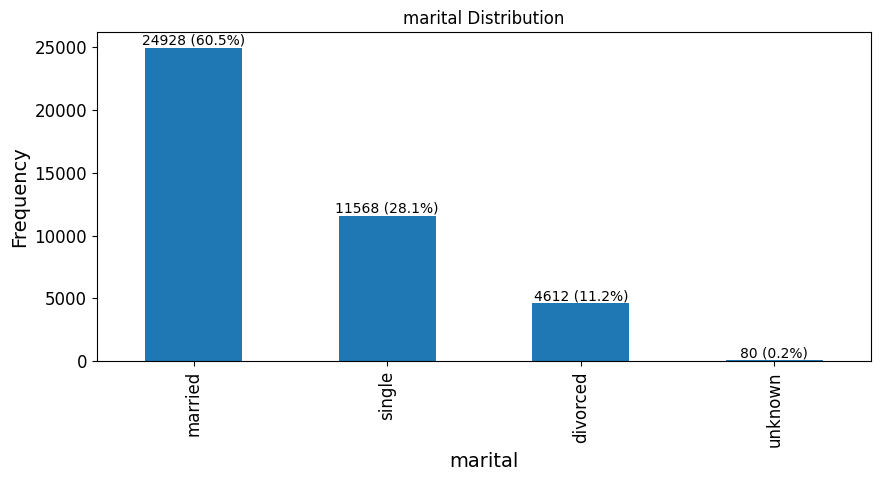

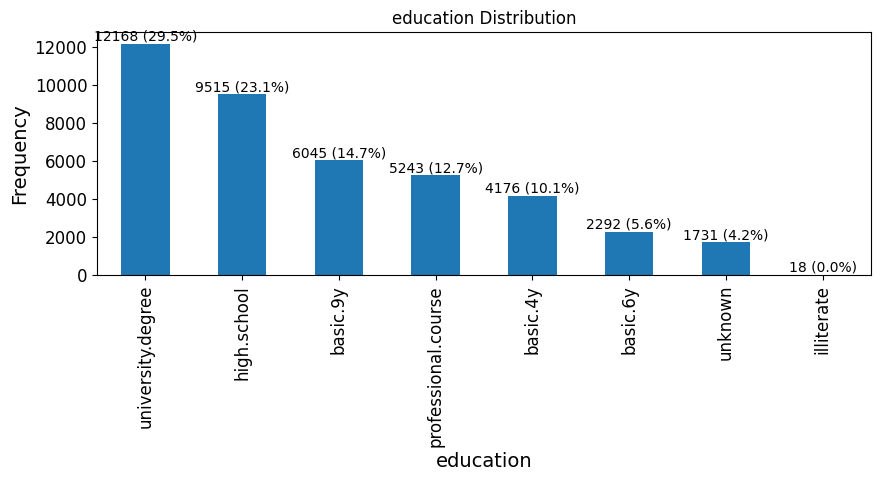

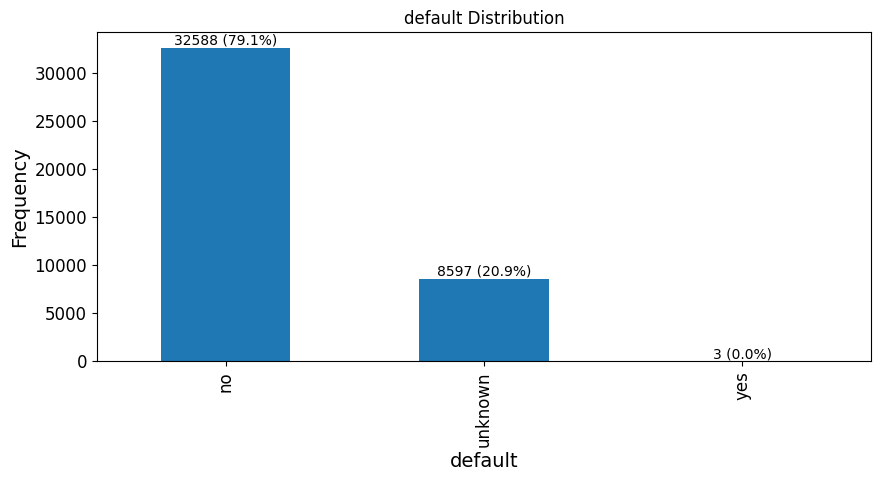

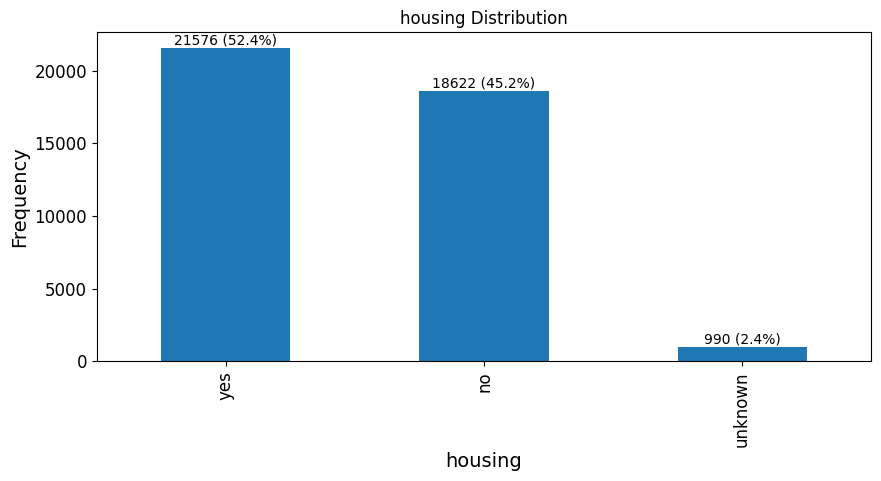

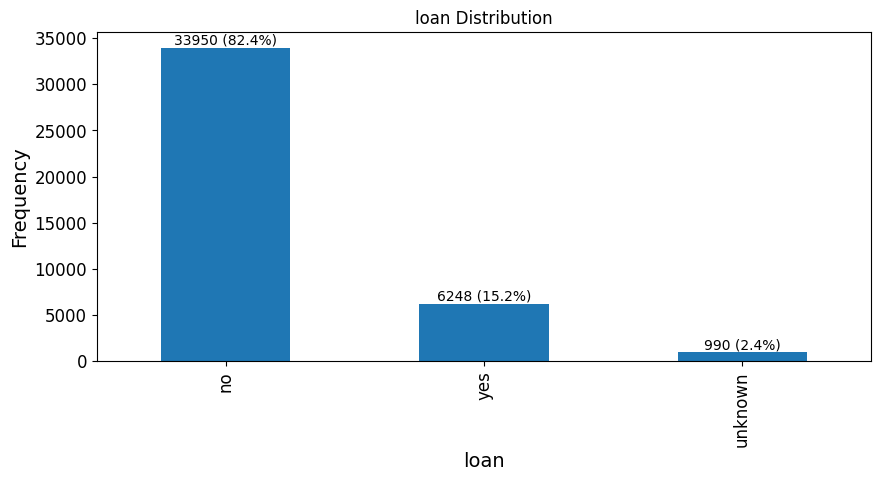

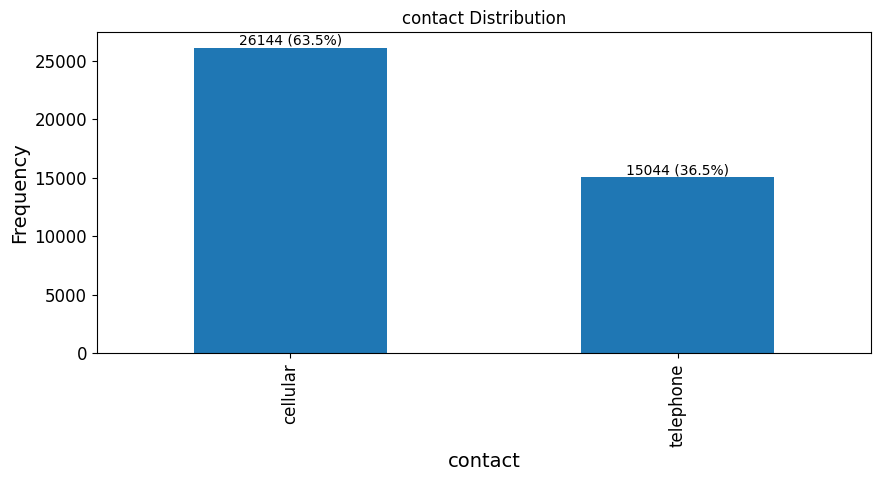

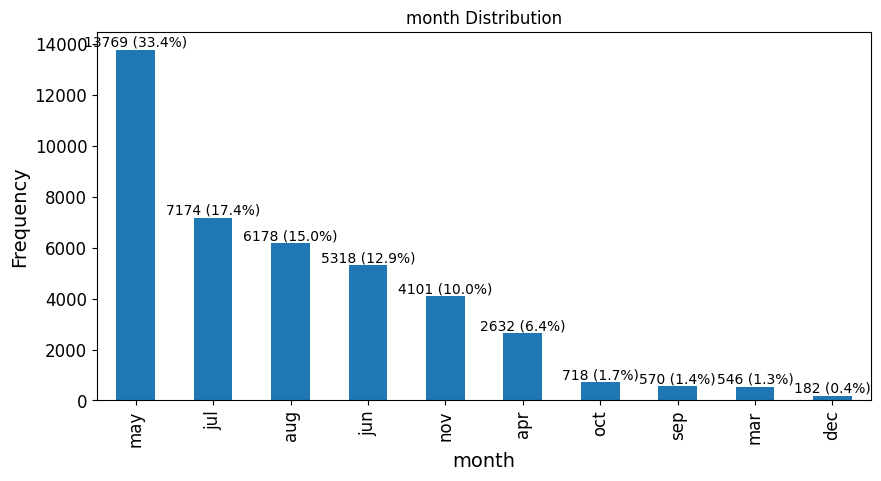

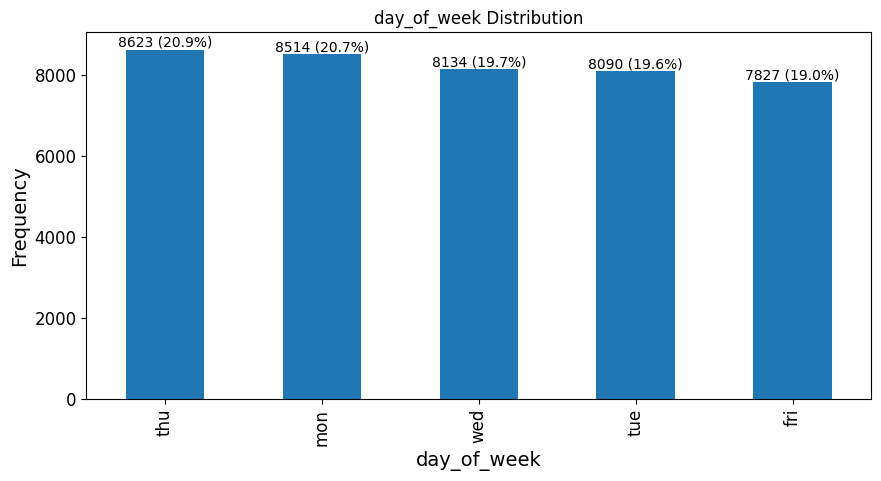

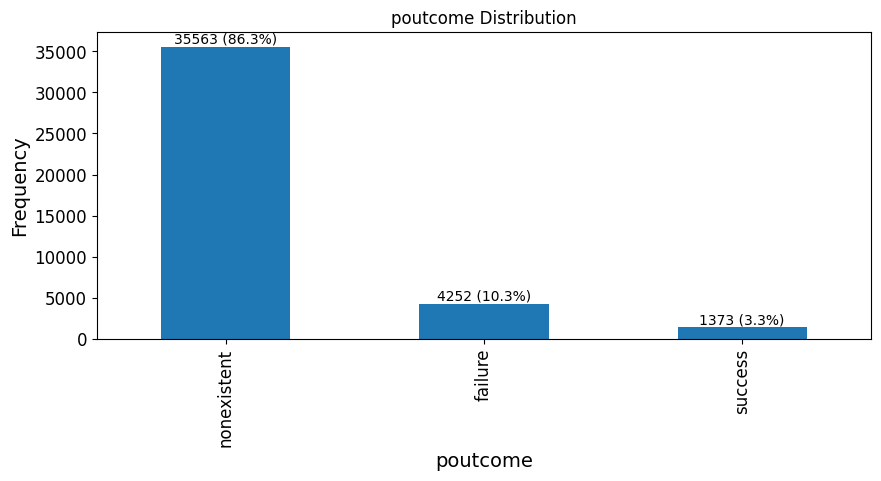

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))  # Adjust size for better visualization
    value_counts = df[feature].value_counts()
    ax = value_counts.plot(kind='bar')

    # Add frequency labels to each bar
    for idx, value in enumerate(value_counts):
        total = len(df[feature])
        percentage = (value / total) * 100
        ax.text(idx, value + 0.5, f'{value} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=10)

    # Add titles and labels
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature, fontsize= 14)
    plt.ylabel('Frequency', fontsize= 14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    plt.tight_layout(pad=5.0)  # Add padding around the entire plot
    plt.show()



There are unknown in:
* job: I think it is not that important feature job with subscribing deposit. Bec there a least unknown. I would give that mean "entrepreneur"
* marital: There are a few unknown so i would attach it random
* education: There are a few unknown so i would attach it random
* default: yes is like outlier. So i will make unknowns -> no
* housing: That may indicate something
* loan: That may indicate something

## Multivariate Analysis

### PairPlot

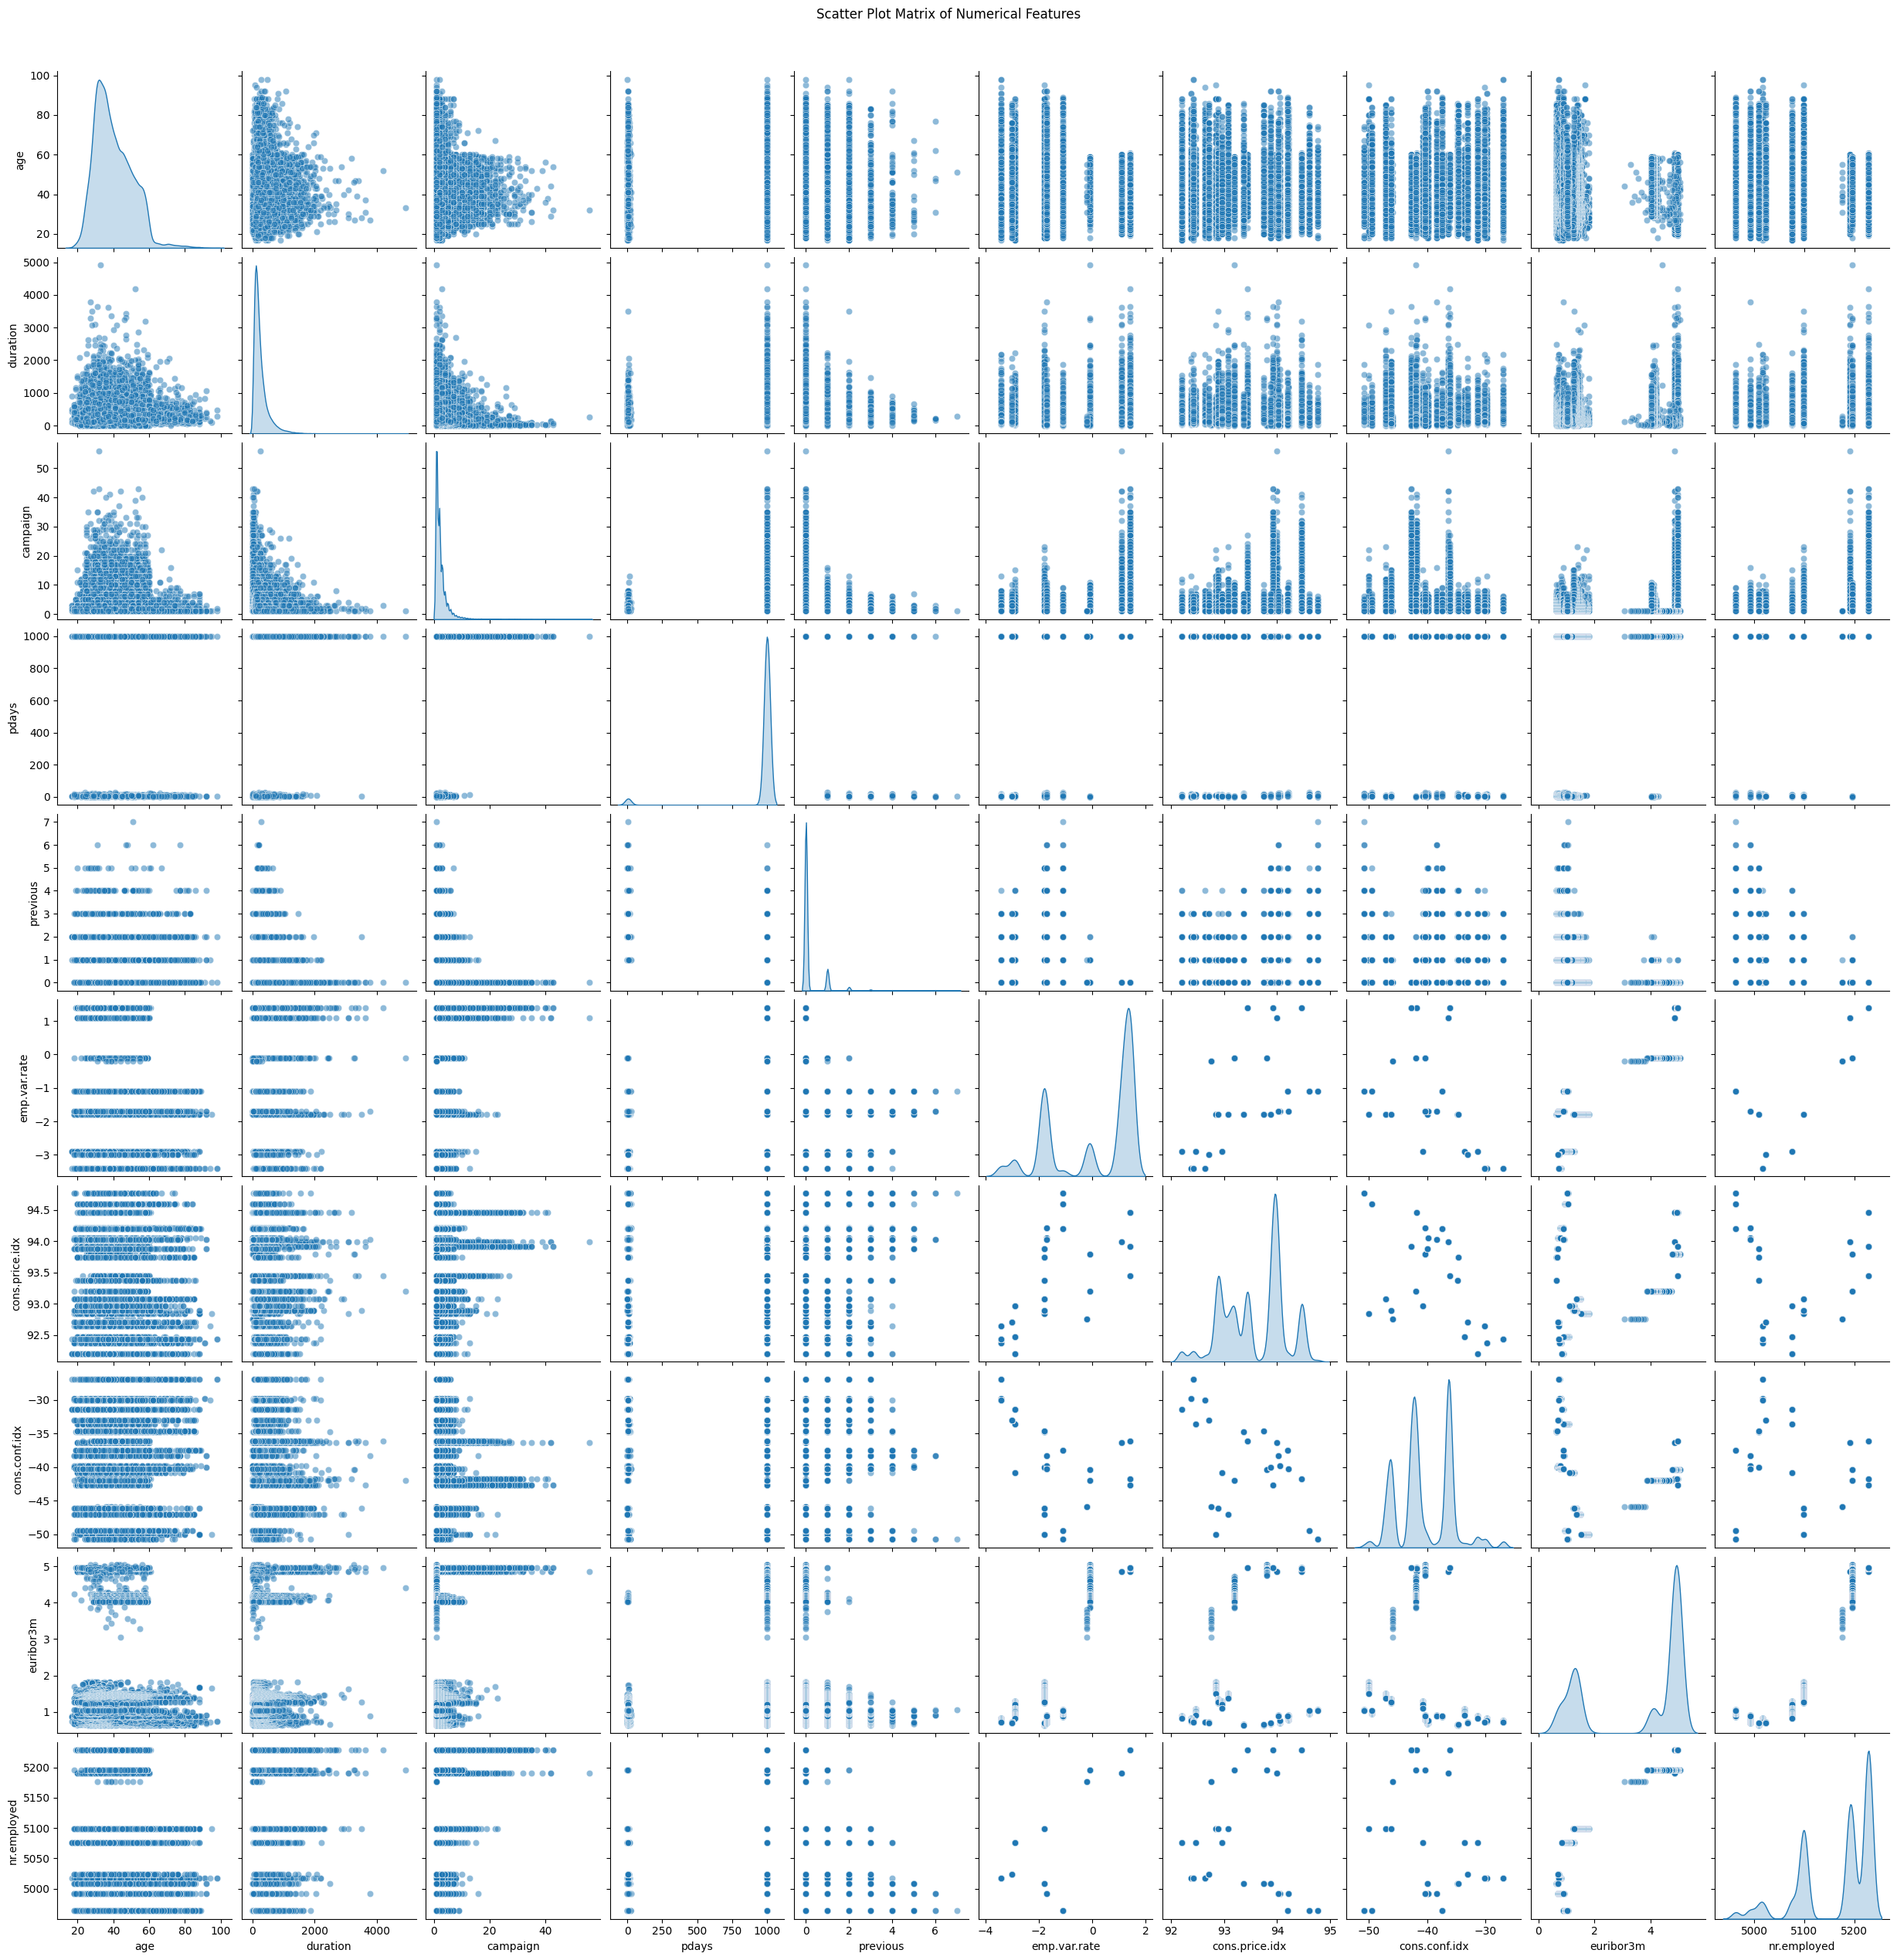

In [ ]:
# Plot scatter plot matrix
sns.pairplot(df[numeric_features], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Scatter Plot Matrix of Numerical Features', y=1.02)
plt.show()

From the analysis, I see that my data is clustered in certain value ranges, especially for external social effects.

The pdays graphs seem meaningless because the median is concentrated at 999, which acts as a placeholder for "not contacted."

The relationship between duration, age, and campaign stands out.

People around 40 years old appear to have longer call durations.
They also seem to be contacted more often for campaigns.

### Correlation Heatmap

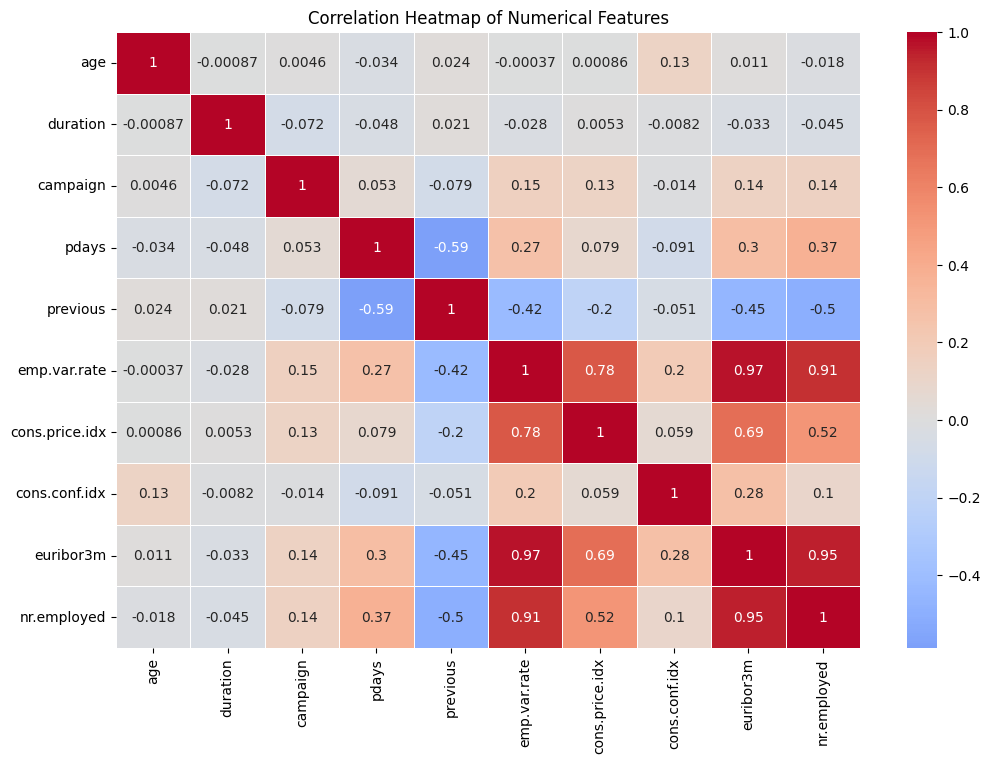

In [ ]:
# Compute the correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


We already observed clustering in external social and economic effects. These features have high correlations, which makes sense as social and economic factors naturally influence each other.

There is a strong negative correlation between pdays and previous. Customers who were contacted more recently (low pdays) had more interactions in previous campaigns.

There is no strong connection between age, duration, and campaign. This indicates that they might be important features as they provide unique information.

emp.var.rate, euribor3m, and nr.employed are highly correlated, which could lead to multicollinearity issues in the model.

### New Feature

In [ ]:
df['economic_health_score'] = df['emp.var.rate'] + df['euribor3m'] + df['nr.employed']
df.drop(columns=['emp.var.rate', 'euribor3m', 'nr.employed'], inplace=True)

numeric_features.remove('emp.var.rate')
numeric_features.remove('euribor3m')
numeric_features.remove('nr.employed')
numeric_features.append('economic_health_score')

# Part 2: DP

There were "unknown" values in 5 categorical features in the dataset. I plan to assign appropriate values as follows:

* job: Assign the 'entrepreneur' value.
* marital: Assign "married."
* education: Assign based on "job" as the last step.
* default: Assign the mode value, "no."
* housing: Check if the 883 individuals are the same as those with "loan."
* loan: Check if the 883 individuals are the same as those with "housing."

## Categorical Features Fill Unknown Values

In [ ]:
comparison = (df['housing'] == 'unknown') == (df['loan'] == 'unknown')

true_count = comparison.sum()
false_count = len(comparison) - true_count  # Count of False values

print(f"True values: {true_count}")
print(f"False values: {false_count}")

# I understand that the individuals with "unknown" values in the housing and loan features are the same.
#If a person has "unknown" in the housing feature, they also have "unknown" in the loan feature.


True values: 41188
False values: 0


* The "unknown" values in housing and loan are for the same individuals, and their data proportion is low. Therefore, I will fill these values with "no."
* Also i will assign 'entrepreneur' to job bec i see it mean in plot.
* default will be no because no is mod in fedault feature.

In [ ]:
df['job'] = df['job'].replace('unknown', 'entrepreneur')
df['default'] = df['default'].replace('unknown', 'no')

df['housing'] = df['housing'].replace('unknown', 'no')
df['loan'] = df['loan'].replace('unknown', 'no')

df['marital'] = df['marital'].replace('unknown', 'married')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,economic_health_score
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,no,5196.957
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,no,5196.957
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,no,5196.957
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,no,5196.957
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,no,5196.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,94.767,-50.8,yes,4963.528
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,94.767,-50.8,no,4963.528
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,94.767,-50.8,no,4963.528
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,94.767,-50.8,yes,4963.528


In [ ]:
# Fill the education level based on the job.
df.loc[(df['education'] == 'unknown') & (df['job'] == 'admin.'), 'education'] = 'high.school'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'blue-collar'), 'education'] = 'basic.6y'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'entrepreneur'), 'education'] = 'university.degree'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'housemaid'), 'education'] = 'basic.4y'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'management'), 'education'] = 'university.degree'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'retired'), 'education'] = 'high.school'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'self-employed'), 'education'] = 'high.school'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'services'), 'education'] = 'basic.9y'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'student'), 'education'] = 'high.school'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'technician'), 'education'] = 'university.degree'
df.loc[(df['education'] == 'unknown') & (df['job'] == 'unemployed'), 'education'] = 'basic.6y'


## Numeric Features Data Preprocces


I am directly removing rows where duration is 0 because it directly affects y and has no real-world meaning. Since these individuals were not contacted, the y value is essentially unknown.

For pdays, replacing 999 with 0 is a better representation to indicate that no contact was made.

In [ ]:
df = df[df['duration'] != 0]
df[df['duration'] == 0] #Control

df['pdays'] = df['pdays'].replace(999,0)

## Prepare categorical and numerical data

### Categorical to Numerical Transformation

In [ ]:
df_prepared = df.copy()

In [ ]:
#job

#This mapping is designed to rank jobs based on assumed financial stability and likelihood of subscribing to financial products.
# Define the ordinal mapping
job_mapping = {
    "student": 0,
    "unemployed": 1,
    "housemaid": 2,
    "blue-collar": 3,
    "services": 4,
    "self-employed": 5,
    "technician": 6,
    "admin.": 7,
    "retired": 8,
    "entrepreneur": 9,
    "management": 10,
}

# Map the 'job' column to numerical values
df_prepared['job'] = df['job'].map(job_mapping)
df_prepared

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,economic_health_score
0,56,2,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,-36.4,no,5196.957
1,57,4,married,high.school,no,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,-36.4,no,5196.957
2,37,4,married,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,-36.4,no,5196.957
3,40,7,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,-36.4,no,5196.957
4,56,4,married,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,-36.4,no,5196.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,8,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,94.767,-50.8,yes,4963.528
41184,46,3,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,94.767,-50.8,no,4963.528
41185,56,8,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,94.767,-50.8,no,4963.528
41186,44,6,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,94.767,-50.8,yes,4963.528


In [ ]:
df_prepared['marital'] = np.where(df['marital'] == 'married', 2,
                         np.where(df['marital'] == 'divorced', 1, 0))
df_prepared.value_counts('marital')
df_prepared

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,economic_health_score
0,56,2,2,basic.4y,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,-36.4,no,5196.957
1,57,4,2,high.school,no,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,-36.4,no,5196.957
2,37,4,2,high.school,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,-36.4,no,5196.957
3,40,7,2,basic.6y,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,-36.4,no,5196.957
4,56,4,2,high.school,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,-36.4,no,5196.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,8,2,professional.course,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,94.767,-50.8,yes,4963.528
41184,46,3,2,professional.course,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,94.767,-50.8,no,4963.528
41185,56,8,2,university.degree,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,94.767,-50.8,no,4963.528
41186,44,6,2,professional.course,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,94.767,-50.8,yes,4963.528


I think "illiterate" has the least financial stability, while "university.degree" represents individuals with the most financial opportunities. So i use ordinal mapping

In [ ]:
education_mapping = {
    "illiterate": 0,
    "basic.4y": 1,
    "basic.6y": 2,
    "basic.9y": 3,
    "high.school": 4,
    "professional.course": 5,
    "university.degree": 6
}

df_prepared['education'] = df['education'].map(education_mapping)

df_prepared


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,economic_health_score
0,56,2,2,1,no,no,no,telephone,may,mon,261,1,0,0,nonexistent,93.994,-36.4,no,5196.957
1,57,4,2,4,no,no,no,telephone,may,mon,149,1,0,0,nonexistent,93.994,-36.4,no,5196.957
2,37,4,2,4,no,yes,no,telephone,may,mon,226,1,0,0,nonexistent,93.994,-36.4,no,5196.957
3,40,7,2,2,no,no,no,telephone,may,mon,151,1,0,0,nonexistent,93.994,-36.4,no,5196.957
4,56,4,2,4,no,no,yes,telephone,may,mon,307,1,0,0,nonexistent,93.994,-36.4,no,5196.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,8,2,5,no,yes,no,cellular,nov,fri,334,1,0,0,nonexistent,94.767,-50.8,yes,4963.528
41184,46,3,2,5,no,no,no,cellular,nov,fri,383,1,0,0,nonexistent,94.767,-50.8,no,4963.528
41185,56,8,2,6,no,yes,no,cellular,nov,fri,189,2,0,0,nonexistent,94.767,-50.8,no,4963.528
41186,44,6,2,5,no,no,no,cellular,nov,fri,442,1,0,0,nonexistent,94.767,-50.8,yes,4963.528


In [ ]:
df_prepared['default']= (df['default']=='yes').astype(int)
df_prepared['housing']= (df['housing']=='yes').astype(int)
df_prepared['loan']= (df['loan']=='yes').astype(int)
df_prepared['contact']= (df['contact']== 'telephone').astype(int)
df_prepared['y']= (df['y']== 'yes').astype(int)
df_prepared.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,economic_health_score
0,56,2,2,1,0,0,0,1,5,1,261,1,0,0,nonexistent,93.994,-36.4,0,5196.957
1,57,4,2,4,0,0,0,1,5,1,149,1,0,0,nonexistent,93.994,-36.4,0,5196.957
2,37,4,2,4,0,1,0,1,5,1,226,1,0,0,nonexistent,93.994,-36.4,0,5196.957
3,40,7,2,2,0,0,0,1,5,1,151,1,0,0,nonexistent,93.994,-36.4,0,5196.957
4,56,4,2,4,0,0,1,1,5,1,307,1,0,0,nonexistent,93.994,-36.4,0,5196.957


In [ ]:
#Ordinal encoding for days and month

month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
                 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
                 'nov': 11, 'dec': 12}
df_prepared['month'] = df['month'].map(month_mapping)

day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
df_prepared['day_of_week'] = df['day_of_week'].map(day_mapping)
df_prepared

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,economic_health_score
0,56,2,2,1,0,0,0,1,5,1,261,1,0,0,nonexistent,93.994,-36.4,0,5196.957
1,57,4,2,4,0,0,0,1,5,1,149,1,0,0,nonexistent,93.994,-36.4,0,5196.957
2,37,4,2,4,0,1,0,1,5,1,226,1,0,0,nonexistent,93.994,-36.4,0,5196.957
3,40,7,2,2,0,0,0,1,5,1,151,1,0,0,nonexistent,93.994,-36.4,0,5196.957
4,56,4,2,4,0,0,1,1,5,1,307,1,0,0,nonexistent,93.994,-36.4,0,5196.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,8,2,5,0,1,0,0,11,5,334,1,0,0,nonexistent,94.767,-50.8,1,4963.528
41184,46,3,2,5,0,0,0,0,11,5,383,1,0,0,nonexistent,94.767,-50.8,0,4963.528
41185,56,8,2,6,0,1,0,0,11,5,189,2,0,0,nonexistent,94.767,-50.8,0,4963.528
41186,44,6,2,5,0,0,0,0,11,5,442,1,0,0,nonexistent,94.767,-50.8,1,4963.528


poutcome için One-Hot Encoding seçtim çünkü ay gün gibi sıralı bir anlamı yok. Eğitim seviyesi gibi değersel bir anlamı da yok.

In [ ]:
# Applying one-hot encoding to the 'poutcome' column
unique_values = df_prepared['poutcome'].unique()

for value in unique_values:
    df_prepared[f'poutcome_{value}'] = (df_prepared['poutcome'] == value).astype(int)

# Dropping the original 'poutcome' column
df_prepared = df_prepared.drop(columns=['poutcome'])

# Displaying the updated DataFrame
df_prepared

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    2        2          1        0        0     0        1      5   
1       57    4        2          4        0        0     0        1      5   
2       37    4        2          4        0        1     0        1      5   
3       40    7        2          2        0        0     0        1      5   
4       56    4        2          4        0        0     1        1      5   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    8        2          5        0        1     0        0     11   
41184   46    3        2          5        0        0     0        0     11   
41185   56    8        2          6        0        1     0        0     11   
41186   44    6        2          5        0        0     0        0     11   
41187   74    8        2          5        0        1     0        0     11   

       day_of_week  ...  campaign  pdays  previous 

### Scaling

Scaling data before applying Principal Component Analysis (PCA) is essential because PCA is sensitive to the variances of the initial variables; without scaling, variables with higher variance could dominate the principal components

In [ ]:
df_prepared.columns.drop('y')

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'cons.price.idx', 'cons.conf.idx', 'economic_health_score',
       'poutcome_nonexistent', 'poutcome_failure', 'poutcome_success'],
      dtype='object')

In [ ]:
columns = df_prepared.columns.drop('y')
df_prepared.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,economic_health_score,poutcome_nonexistent,poutcome_failure,poutcome_success
0,56,2,2,1,0,0,0,1,5,1,...,1,0,0,93.994,-36.4,0,5196.957,1,0,0
1,57,4,2,4,0,0,0,1,5,1,...,1,0,0,93.994,-36.4,0,5196.957,1,0,0
2,37,4,2,4,0,1,0,1,5,1,...,1,0,0,93.994,-36.4,0,5196.957,1,0,0
3,40,7,2,2,0,0,0,1,5,1,...,1,0,0,93.994,-36.4,0,5196.957,1,0,0
4,56,4,2,4,0,0,1,1,5,1,...,1,0,0,93.994,-36.4,0,5196.957,1,0,0


In [ ]:
# Standardization process
scaler = StandardScaler()
df_scaled = df_prepared.copy()
df_scaled[columns] = scaler.fit_transform(df_prepared[columns])
df_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,economic_health_score,poutcome_nonexistent,poutcome_failure,poutcome_success
0,1.533116,-1.436068,0.762076,-1.922285,-0.008535,-1.048831,-0.422896,1.318238,-0.787855,-1.402519,...,-0.565870,-0.164021,-0.349513,0.722674,0.886440,0,0.348046,0.397728,-0.339309,-0.185709
1,1.629076,-0.614477,0.762076,-0.091472,-0.008535,-1.048831,-0.422896,1.318238,-0.787855,-1.402519,...,-0.565870,-0.164021,-0.349513,0.722674,0.886440,0,0.348046,0.397728,-0.339309,-0.185709
2,-0.290140,-0.614477,0.762076,-0.091472,-0.008535,0.953443,-0.422896,1.318238,-0.787855,-1.402519,...,-0.565870,-0.164021,-0.349513,0.722674,0.886440,0,0.348046,0.397728,-0.339309,-0.185709
3,-0.002258,0.617909,0.762076,-1.312014,-0.008535,-1.048831,-0.422896,1.318238,-0.787855,-1.402519,...,-0.565870,-0.164021,-0.349513,0.722674,0.886440,0,0.348046,0.397728,-0.339309,-0.185709
4,1.533116,-0.614477,0.762076,-0.091472,-0.008535,-1.048831,2.364646,1.318238,-0.787855,-1.402519,...,-0.565870,-0.164021,-0.349513,0.722674,0.886440,0,0.348046,0.397728,-0.339309,-0.185709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164450,1.028704,0.762076,0.518798,-0.008535,0.953443,-0.422896,-0.758588,2.151896,1.431385,...,-0.565870,-0.164021,-0.349513,2.058098,-2.225007,1,-2.750905,0.397728,-0.339309,-0.185709
41184,0.573507,-1.025273,0.762076,0.518798,-0.008535,-1.048831,-0.422896,-0.758588,2.151896,1.431385,...,-0.565870,-0.164021,-0.349513,2.058098,-2.225007,0,-2.750905,0.397728,-0.339309,-0.185709
41185,1.533116,1.028704,0.762076,1.129069,-0.008535,0.953443,-0.422896,-0.758588,2.151896,1.431385,...,-0.204841,-0.164021,-0.349513,2.058098,-2.225007,0,-2.750905,0.397728,-0.339309,-0.185709
41186,0.381586,0.207113,0.762076,0.518798,-0.008535,-1.048831,-0.422896,-0.758588,2.151896,1.431385,...,-0.565870,-0.164021,-0.349513,2.058098,-2.225007,1,-2.750905,0.397728,-0.339309,-0.185709


# Part 3: DR

## PCA

In [ ]:

X = df_scaled.drop(columns=['y'])  # Features
y = df_scaled['y']                 # Target labels

pca = PCA()
X_pca = pca.fit_transform(X)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(data=X_pca)
df_pca['y'] = y

### Explained Variance

In [ ]:
# Calculate explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create a DataFrame for visualization
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance': cumulative_explained_variance
})

# Print explained variance information
print(explained_variance_df)


   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1              1.887166e-01             0.188717
1                  PC2              8.896462e-02             0.277681
2                  PC3              8.407323e-02             0.361754
3                  PC4              7.351809e-02             0.435273
4                  PC5              6.449466e-02             0.499767
5                  PC6              5.494336e-02             0.554711
6                  PC7              5.329086e-02             0.608001
7                  PC8              5.094987e-02             0.658951
8                  PC9              5.029943e-02             0.709251
9                 PC10              4.962844e-02             0.758879
10                PC11              4.706124e-02             0.805940
11                PC12              4.653513e-02             0.852476
12                PC13              4.114066e-02             0.893616
13                PC

The first principal component (PC1) explains 18.87% of the total variance in the dataset.
The second principal component (PC2) explains an additional 8.90%, resulting in a cumulative variance of 27.77% after two components.
By the 10th component, 75.88% of the variance is explained, which is a reasonable amount of variance.

### Add visualizations

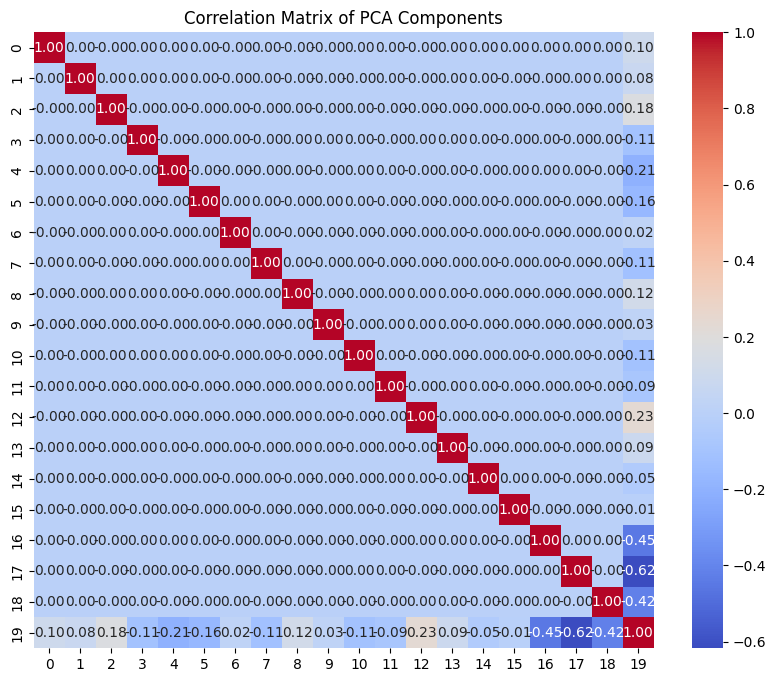

In [ ]:
# Calculate the correlation matrix for PCA components
correlation_matrix = df_pca.drop(columns=['y']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of PCA Components')
plt.show()


df_pca_components.corr() calculates the pairwise correlation coefficients between PCA components.
I applied Principal Component Analysis (PCA), which reduces multicollinearity by creating orthogonal components.
This process resulted in a plot where the principal components are uncorrelated, clearly showing the main directions of variance in the data.


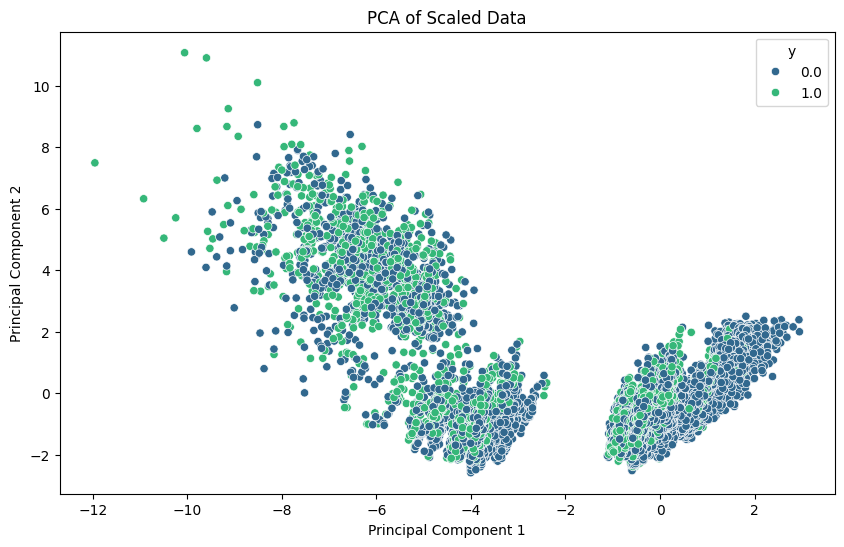

In [ ]:
# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='y', data=df_pca, palette='viridis')
plt.title('PCA of Scaled Data')
plt.show()

### Select the best number of components

When I select the top 2 principal components and visualize the data, I notice that the points are very close to each other and overlap significantly. Perhaps scaling the categorical variables was not the best approach; I’m not sure.

I usually observe clustering within the data, and there is a completely separate cluster on the right. At the right most of the class are 0. Using only two principal components may not be enough to explain the data well.

By the 10th component, 75.88% of the variance is explained, which is a reasonable amount of variance.

## t-SNE

I haven’t fully studied and understood the concept of t-SNE yet. I tried running the code using scikit-learn, but the silhouette score I obtained was low, indicating poor clustering. This suggests that the data points are not well-separated into distinct clusters.

Couldn't finish these part yet...

In [ ]:
## t-SNE

# Apply t-SNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for t-SNE results
df_tsne = pd.DataFrame(data=X_tsne)
df_tsne['y'] = y

### Sil_score

In [ ]:
# Compute silhouette score
sil_score = silhouette_score(X_tsne, y)

In [ ]:
sil_score

0.036274068

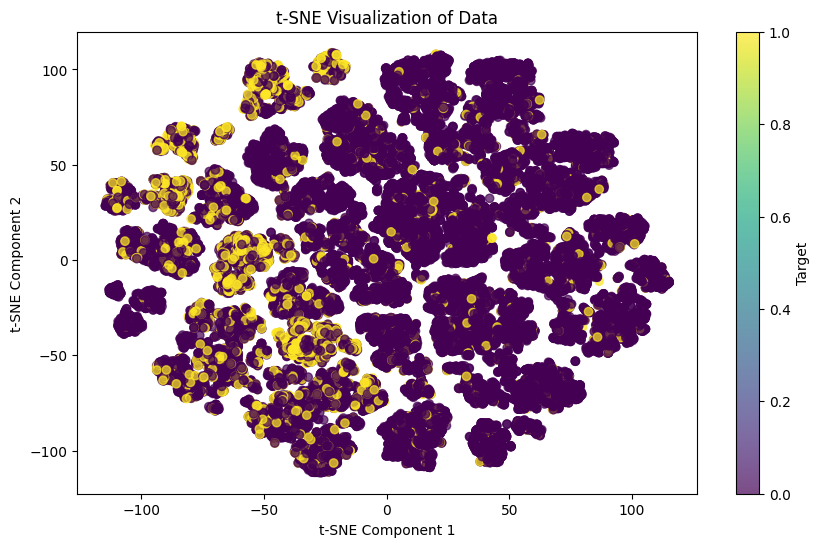

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne[0], df_tsne[1], c=df_tsne['y'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Target')
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### Visulation in same layout PCA t-SNE

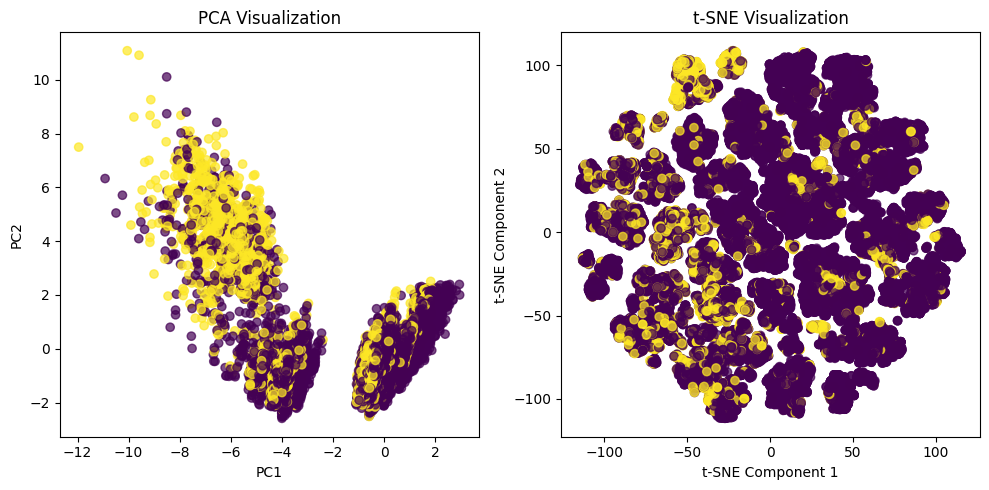

In [ ]:
# PCA Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_pca[0], df_pca[1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')

# t-SNE Visualization
plt.subplot(1, 2, 2)
plt.scatter(df_tsne[0], df_tsne[1], c=y, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()